##**Simple Ann:**

In [1]:
import numpy as np

import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score



In [2]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning/Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x.shape,y.shape)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

(569, 5) (569,)


In [4]:
# shalllow neural network
model = Sequential()
model.add(Dense(5,input_dim=5))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

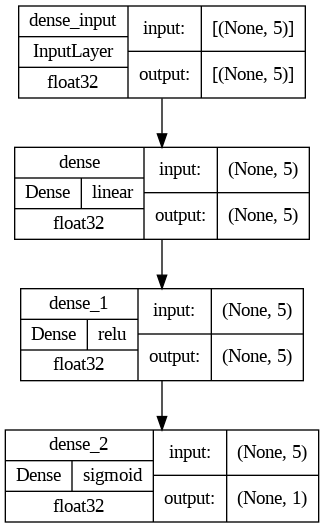

In [5]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 7ms/step - loss: 19.3913 - accuracy: 0.4146
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 12.6852 - accuracy: 0.1734
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 12.3116 - accuracy: 0.1859
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 11.4465 - accuracy: 0.1307
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 11.0117 - accuracy: 0.1357
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 10.4671 - accuracy: 0.1533
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 10.1451 - accuracy: 0.1608
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 9.5569 - accuracy: 0.1357
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 9.2238 - accuracy: 0.1558
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 8.7414 - accuracy: 0.1332
Ep

In [7]:
y_pred=model.predict(x_test)
y_pred=y_pred>0.5
print(accuracy_score(y_pred,y_test))

6/6 [==============================] - 0s 4ms/step
0.8070175438596491


##**Autoencoder:**

In [21]:
encoding_dim = 4
input_img = keras.Input(shape=(5))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(5, activation='sigmoid')(encoded)

In [26]:
autoencoder = keras.Model(input_img, decoded)

In [27]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning/Breast_cancer_data.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x.shape,y.shape)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

(569, 5) (569,)


In [28]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [29]:
autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test,x_test))

Epoch 1/50
2/2 [==============================] - 1s 214ms/step - loss: 9783.4902 - val_loss: 8735.9053
Epoch 2/50
2/2 [==============================] - 0s 30ms/step - loss: 9571.1670 - val_loss: 8539.3711
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 9354.4014 - val_loss: 8340.8828
Epoch 4/50
2/2 [==============================] - 0s 28ms/step - loss: 9140.4834 - val_loss: 8140.6792
Epoch 5/50
2/2 [==============================] - 0s 30ms/step - loss: 8918.7900 - val_loss: 7940.3555
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 8701.1025 - val_loss: 7737.8398
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 8471.5361 - val_loss: 7534.0483
Epoch 8/50
2/2 [==============================] - 0s 32ms/step - loss: 8253.6162 - val_loss: 7329.3340
Epoch 9/50
2/2 [==============================] - 0s 32ms/step - loss: 8027.2500 - val_loss: 7124.7705
Epoch 10/50
2/2 [==============================] - 0s 33ms/step - loss: 

In [30]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [31]:
encoded_inp = encoder.predict(x_test)
print(encoded_inp)
decoded_inp = decoder.predict(encoded_inp)
print(decoded_inp)

6/6 [==============================] - 0s 2ms/step
[[ 79.99822    0.         0.        35.25127 ]
 [ 93.34419    0.         0.        38.665348]
 [ 77.416756   0.         0.        33.387638]
 [157.21284    0.         0.        52.595566]
 [ 71.64586    0.         0.        31.405128]
 [ 87.483826   0.         0.        36.37164 ]
 [ 77.198364   0.         0.        34.116802]
 [ 84.732735   0.         0.        36.46164 ]
 [ 39.839603   0.         0.        20.800741]
 [ 76.07046    0.         0.        32.836693]
 [ 77.76633    0.         0.        33.79532 ]
 [ 71.98402    0.         0.        32.194717]
 [140.78456    0.         0.        48.955975]
 [122.58096    0.         0.        44.855965]
 [ 92.72249    0.         0.        38.26429 ]
 [135.15097    0.         0.        48.60956 ]
 [ 68.461784   0.         0.        31.400759]
 [149.08682    0.         0.        51.658573]
 [ 76.3249     0.         0.        34.96385 ]
 [ 83.208725   0.         0.        34.47713 ]
 [219.209

In [32]:
encoded_train = encoder.predict(x_train)
decoded_train = decoder.predict(encoded_train)

13/13 [==============================] - 0s 2ms/step


In [33]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(x_test,decoded_inp))

103704.05916784401


In [34]:
model = Sequential()
model.add(Dense(5,input_dim=5))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
optimizer=SGD(learning_rate=0.01,momentum=0.1)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(decoded_train,y_train,epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.6181
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.6181
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6181
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6181
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6181
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6181
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6181
Epoch 8/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6181
Epoch 9/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6181
Epoch 10/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6181
Epoch 11/30
13/13 [

In [36]:
pred_auto=model.predict(decoded_inp)
pred_auto=(pred_auto>0.5)
from sklearn.metrics import accuracy_score
print(accuracy_score(pred_auto,y_test))

6/6 [==============================] - 0s 4ms/step
0.6491228070175439
